<a href="https://colab.research.google.com/github/RobertoFernandez1/EIE_401_MULTIMEDIA/blob/main/Actividad_3_FernandezRoberto_RobertoFernandez1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Roberto Fernandez Fuentes</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Generar una imagen de una función trigronométrica (función bidimensional)
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal.


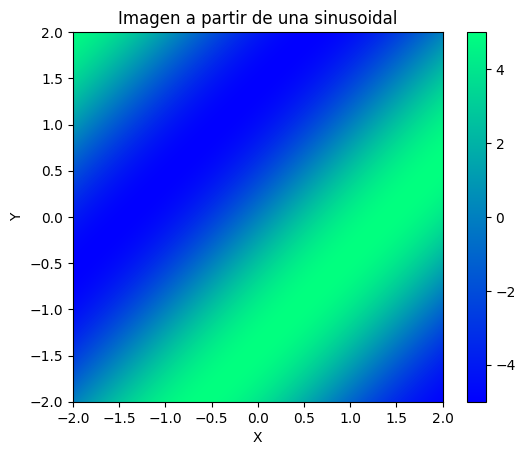

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


tamaño = 512  # píxeles
frecuencia = 0.5  # ciclos por píxel
orientación = np.pi / 4  # Orientación (radianes)
fase = 0  # Fase (grados)
contraste = 5.0

def onda_sinusoidal(tamaño,frecuencia,orientacion,fase,contraste):#definimos la funcion def sinusoidal
   # Creamos una cuadrícula de coordenadas
    x = np.linspace(-1, 1, tamaño)
    y = np.linspace(-1, 1, tamaño)
    X, Y = np.meshgrid(x, y)


    t = np.arctan2(Y, X)
    t -= orientación
    o = 2 * np.pi * frecuencia #angulo
    rad = fase * np.pi / 180  # Convertir la fase de grados a radianes
    imagen = contraste * np.sin(o * X * np.cos(orientación) + o * Y * np.sin(orientación) + rad)
    return imagen

imagen = onda_sinusoidal(tamaño, frecuencia, orientación, fase, contraste)  #llamamos a la funcion que definimos anteriormente con sus respectivos parametros


plt.imshow(imagen, cmap='winter', extent=[-2, 2, -2, 2])#con el cmap podemos definir como seran los tonos de la grafica ,en este caso elegi winter
plt.colorbar()
plt.title('Imagen a partir de una sinusoidal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



## 2. Generar señales


### 2. Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


Text(0, 0.5, 'Tiempo[s]')

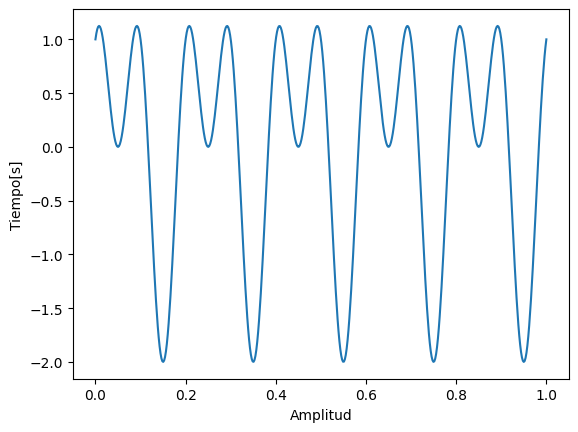

In [ ]:
#definimos la libreria con la que vamos a trabajar para poder platear la funcion
import numpy as np
import matplotlib.pyplot as plt
frecuencia=5
tiempo=np.linspace(0,1,500)
senal=np.sin(2*np.pi*frecuencia*tiempo)
senal1=np.cos(2*2*np.pi*frecuencia*tiempo)
senal2=senal+senal1
plt.plot(tiempo,senal2)
plt.xlabel("Amplitud")
plt.ylabel("Tiempo[s]")


### 2.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

Text(0, 0.5, 'Tiempo[s]')

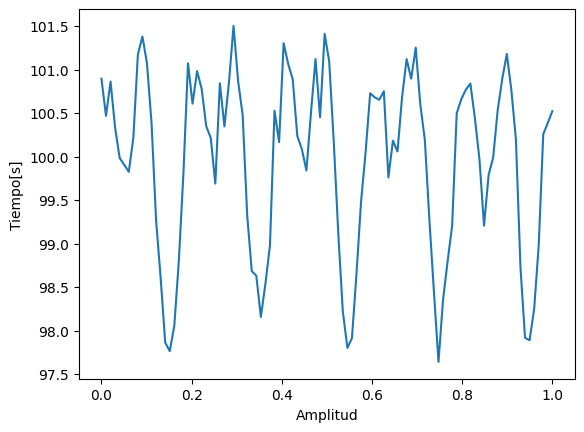

In [ ]:
#Generamos la misma funcion del punto 2.1
import numpy as np
import matplotlib.pyplot as plt
media=100
desviacion_estandar=0.3
frecuencia=5
tiempo=np.linspace(0,1,100)
senal=np.sin(2*np.pi*frecuencia*tiempo)
senal1=np.cos(2*2*np.pi*frecuencia*tiempo)
senal2=senal+senal1
ruido=np.random.normal(media,desviacion_estandar,100)#Mediante la funcion np.random.normal puedo crear el ruido gaussiano
senal_ruido=senal2+ruido #Sumo ambas señales
plt.plot(tiempo,senal_ruido)
plt.xlabel("Amplitud")
plt.ylabel("Tiempo[s]")


## 3. Análisis en el dominio de Fourier
<p align="justify">
A partir de las señales anteriores, aplica la transformada de Fourier.    


### 3.1 Obtenga la transformada de Fourier para las señales que generaste en el  punto anterior


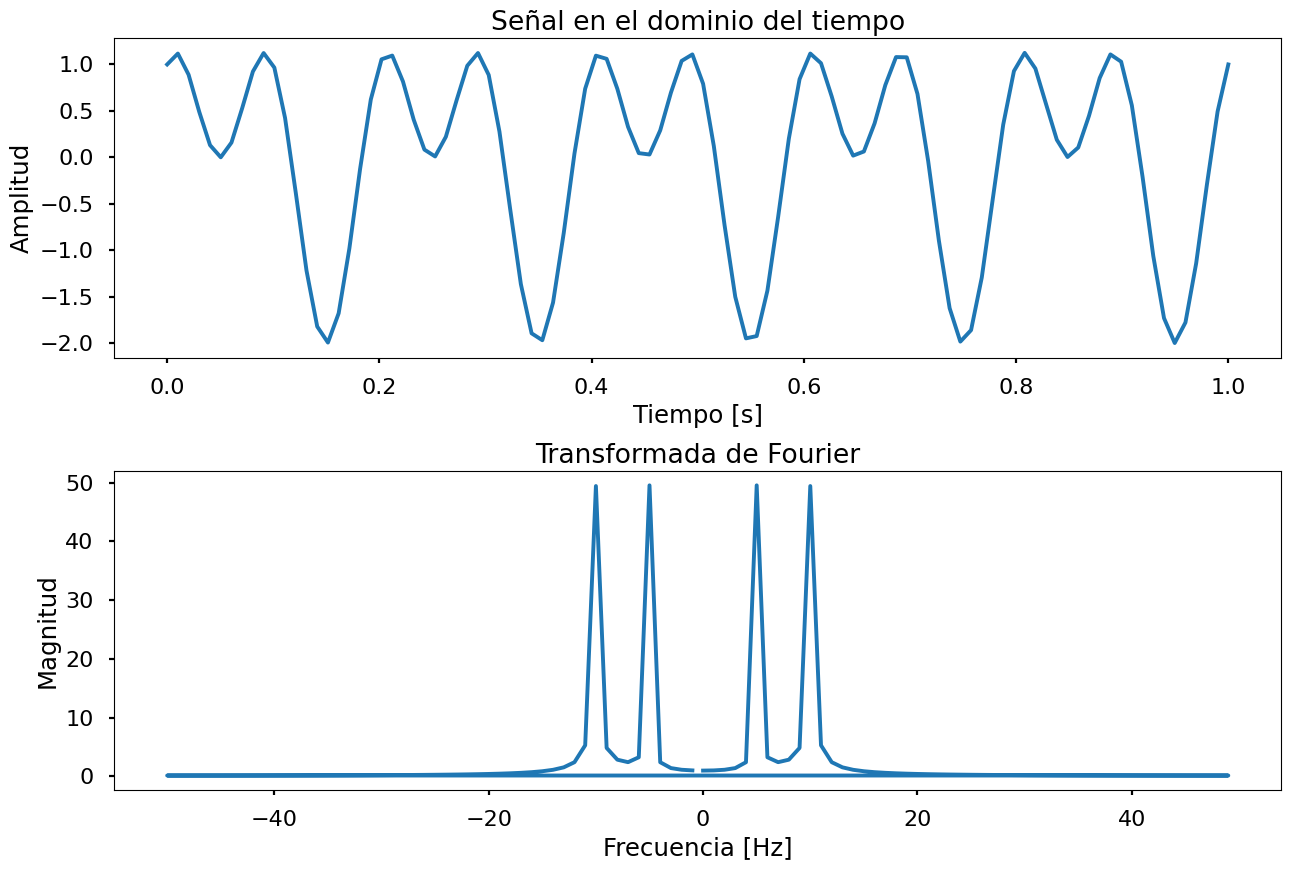

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tiempo = 1  # Duración de la señal en segundos
tasa_muestreo = 100  # Frecuencia de muestreo en Hz
num_muestras = int(tiempo * tasa_muestreo)

frecuencia = 5
tiempo = np.linspace(0, tiempo, tasa_muestreo)

senal = np.sin(2 * np.pi * frecuencia * tiempo)
senal1 = np.cos(2 * 2 * np.pi * frecuencia * tiempo)
senal2 = senal + senal1

# Calculamos la transformada de Fourier con la funcion fft.fft
transformada = np.fft.fft(senal2)

# Calculamos las frecuencias correspondiantes
frecuencias = np.fft.fftfreq(num_muestras, 1 / tasa_muestreo)

# Graficar la señal en el dominio del tiempo
plt.subplot(2, 1, 1)
plt.plot(tiempo, senal2)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal en el dominio del tiempo')

# Graficar la magnitud de la transformada de Fourier en el dominio de la frecuecias que definimos anteriormente
plt.subplot(2, 1, 2)
plt.plot(frecuencias, np.abs(transformada))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Transformada de Fourier')
plt.tight_layout()

plt.show()


### 3.2 Obten un resultado Normalizado:
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

### 3.3 Encuentra la transformada inversa de Fourier
_solo para una señal de las dos que generaste inicialmente_ En este caso puede usar una librería. Explica en detalle que hace la librería y el resultado que arroja.

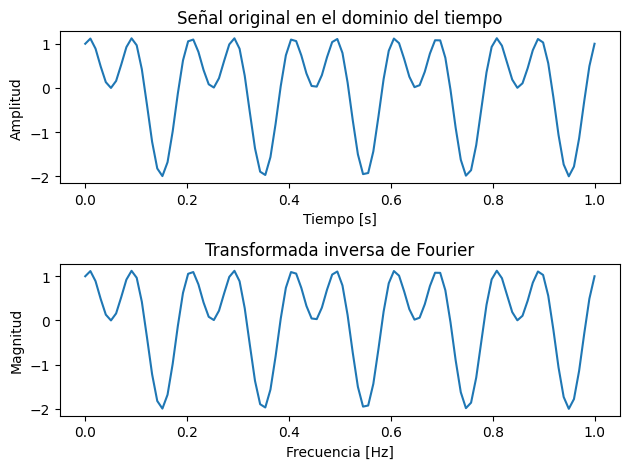

In [14]:
from sys import platform
import numpy as np
import matplotlib.pyplot as plt

tiempo = 1  # Duración de la señal en segundos
tasa_muestreo = 100  # Frecuencia de muestreo en Hz
num_muestras = int(tiempo * tasa_muestreo)

frecuencia = 5
tiempo = np.linspace(0, tiempo, tasa_muestreo)

senal = np.sin(2 * np.pi * frecuencia * tiempo)
senal1 = np.cos(2 * 2 * np.pi * frecuencia * tiempo)
senal2 = senal + senal1

# Calculamos la transformada de Fourier con la funcion fft.fft
transformada = np.fft.fft(senal2)

# Calculamos las frecuencias correspondiantes
frecuencias = np.fft.fftfreq(num_muestras, 1 / tasa_muestreo)


inverse_dft = np.fft.ifft(transformada)


# Graficar la señal en el dominio del tiempo
plt.subplot(2, 1, 1)
plt.plot(tiempo, senal2)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal original en el dominio del tiempo')

# Graficar la magnitud de la transformada de Fourier en el dominio de la frecuecias que definimos anteriormente
plt.subplot(2, 1, 2)
plt.plot(tiempo, inverse_dft)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Transformada inversa de Fourier')
plt.tight_layout()

plt.show()






### 3.4 Escriba un algoritmo para la Transformada Discreta de Fourier(DFT) 2-D y muéstrelo
_solo para una señal de las dos que generaste inicialmente_
Aquí debe implementar el algoritmo de DFT, es decir, NO puedes usar paquetes externos para calcular la transformada.

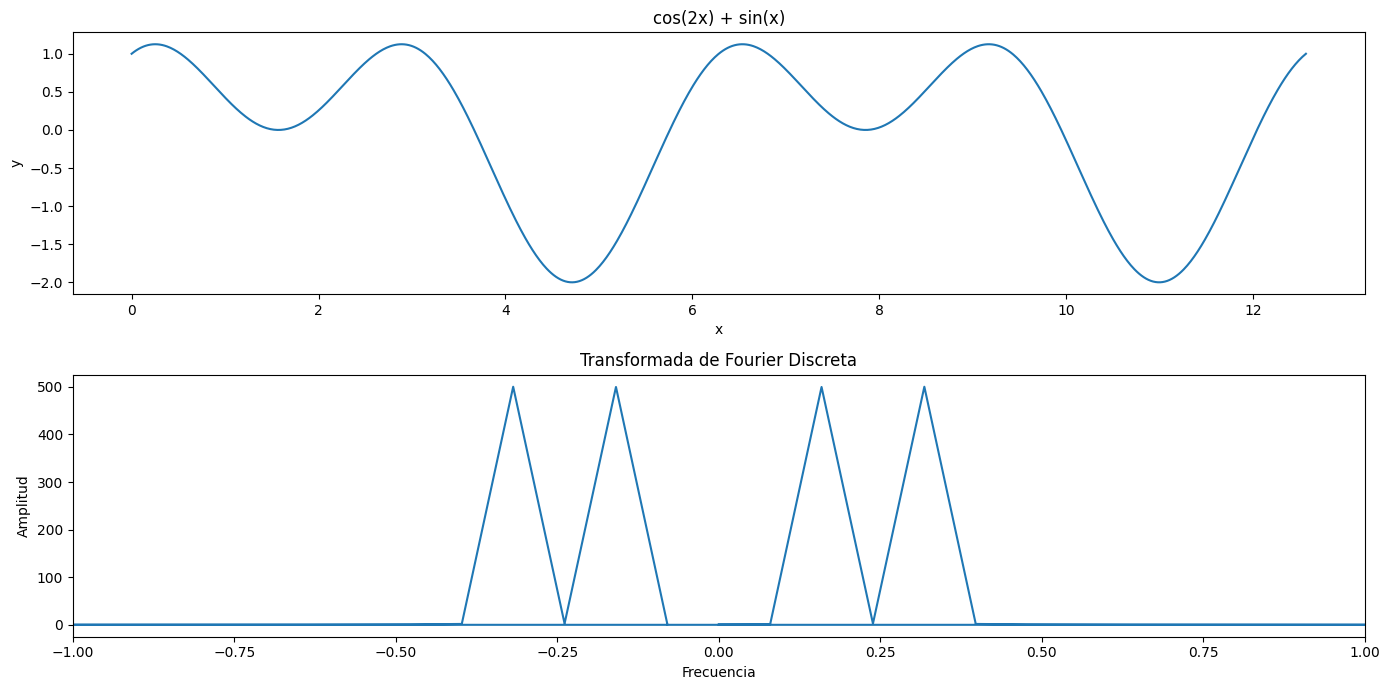

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq#con esta libreria podemos calcular la transformada de fourier llamando fft,lo cual simplificara el codigo

def g(x):#definimos nuestra funcion para poder llamarla posteriormente
  return np.cos(2*x)+np.sin(x)
#Definimos nuestro dominio y recorrido
xmin=0
xmax=4*np.pi
numero_puntos=1000
x_1=np.linspace(xmin,xmax,numero_puntos)
y=g(x_1)
t=(xmax-xmin)/numero_puntos
dft=fft(y) #calculamos la transformada de fourier
frecuencia=fftfreq(numero_puntos,t)#pasamos al dominio de la frecuencia ,llamamos la funcion de la libreria scipy fftfreq

plt.figure(figsize=(14,7))
plt.subplot(2, 1, 1)
plt.plot(x_1, y)
plt.title('cos(2x) + sin(x)')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2, 1, 2)
plt.plot(frecuencia, np.abs(dft))
plt.title('Transformada discreta de fourier (DFT)')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-1,1)  # Limitar el rango de frecuencias para visualización

plt.tight_layout()#este comado nos ayuda a que las dos graficas no queden juntas y se puedan visualizar de mejor forma al graficar
plt.show()




### 3.5 Explica tus hallazgos
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

2.En el 3.1 representa 4 impulsos , lo cual tiene sentido ya que si calculamos la transformada de fourier de la funcion a trabajar mediante el uso de las tabalas afirmativamente da el resultado que nos dio en la grafica.En el 3.3 recuperamos la funcion generada en el 3.1 y la volvemos al dominio del tiempo ,lo cual en la practica nos deberia graficar la funcion original en el punto 2 ,y podemos ver mediante la grafica que asi ocurrio .En el 3.4 la transformada discreta de fourier nos permite trabajar una señal en terminos de sus componentes frecuenciales ,la señal triangular por asi decirlo que se forma en la grafica representa los picos en el espectro de frecuencia ,por ejemplo para 1/2pi tenemos un maximo en cos(2x) ,el cual podemos ver en el grafico ,es aproximadamente 0.15 ,mientras que para sin(x) tenemos un maximo para 1/pi ,aproximadamente 0.31,lo cual coincide con lo que podemos ver en el grafico.

## 4. Referencias
<p align="justify">
    


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html